In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

In [27]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit
import matplotlib.pyplot as plt
import numpy as np

## Import the 6 strings data set

In [4]:
# TODO : User input the filenames

# Filenames
notes = ['E0', 'A0', 'D0', 'G0', 'B0', 'E1']
string_files = ['soundfiles/Wood_Guitar/Wood_' + note + '_1.wav' for note in notes]
names = ['E2', 'A2', 'D3', 'G3', 'B3', 'E4']

strings = []
for file, name in zip(string_files, names):
    strings.append(Sound(file, name=name).condition(return_self=True))

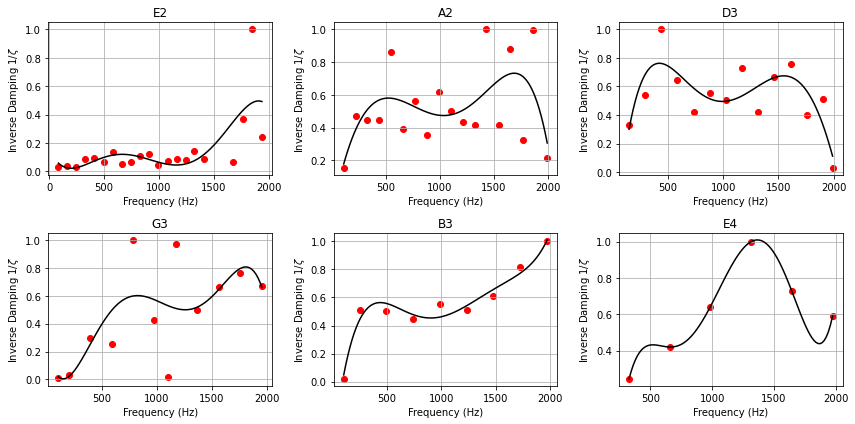

In [25]:
fig, axs = plt.subplots(2,3, figsize= (12,6))

for string, note, ax in zip(strings, names, axs.reshape(-1)):
    plt.sca(ax)
    string.signal.plot('peak damping', normalize=True)
    plt.title(note)
plt.tight_layout()

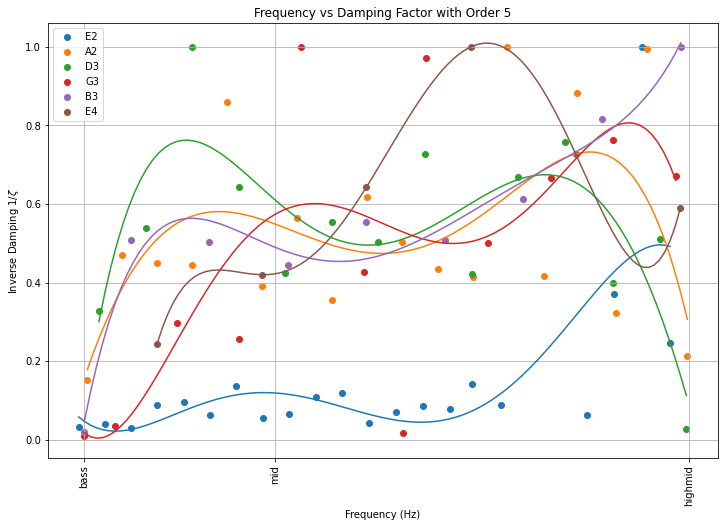

In [24]:
plt.figure(figsize=(12,8))
for string, note in zip(strings, names):
    string.signal.plot('peak damping', normalize=True, ticks='bins', label=note)
plt.legend() 
plt.show()

## Combining the 6 strings

In [65]:
zetas = []
freqs = []
for string in strings:
    string.SP.change('fft_range', 2000)
    zetas.append(1/np.array(string.signal.peak_damping()))
    freqs.append(string.signal.fft_frequencies()[string.signal.peaks()])

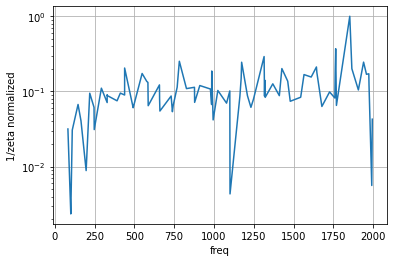

In [67]:
# Flatten the arrays
zetas = np.hstack(zetas)
freqs = np.hstack(freqs)

# Sort both to the frequency
zetas = zetas[np.argsort(freqs)]
freqs = freqs[np.argsort(freqs)]

# Plot
plt.plot(freqs, zetas*(1/zetas.max()))
plt.xlabel('freq')
plt.ylabel('1/zeta normalized')
plt.grid('on')
plt.yscale('log')